In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


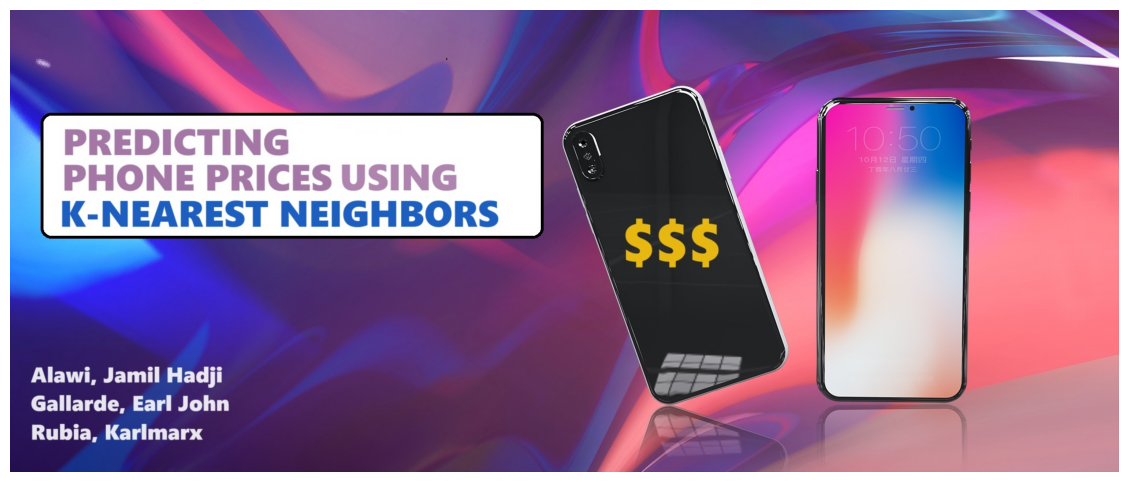

In [81]:
import matplotlib.pyplot as plt

img = plt.imread('phones.jpg')
plt.figure(figsize=(15, 6))
plt.axis('off')
plt.imshow(img)

**Introduction**

This dataset represents the specifications and features of various mobile phones, aimed at exploring the relationships between different attributes and the overall pricing category of each phone. The objective is to develop a predictive model that can accurately classify mobile phones into price ranges based on their specifications. This kind of analysis is particularly useful for companies in the mobile industry to strategically price their products and for consumers to make informed decisions based on their preferences and budget.

The dataset includes several features that are typical for mobile phones:

    1. Battery Power: Total energy a battery can store at one time, measured in mAh.
    2. Bluetooth (blue): Whether the phone has Bluetooth functionality (Yes or No).
    3. Clock Speed: The speed at which the microprocessor executes instructions.
    4. Dual SIM (dual_sim): Whether the phone supports dual SIM cards (Yes or No).
    5. Front Camera (fc): The number of megapixels of the front camera.
    6. 4G (four_g): Whether the phone has 4G connectivity (Yes or No).
    7. And many more features that include other technical specifications like
    internal memory, mobile depth, weight, number of cores, primary camera megapixels,
    pixel resolution, RAM, screen height and width, talk time, 3G and touchscreen
    availability, and Wi-Fi connectivity.

The target variable, <i><b>price_range</b></i>, indicates the price category of each phone, which we aim to predict based on the features mentioned above.

**Problem Statement**

The primary objective is to employ the K-Nearest Neighbors (KNN) algorithm, a simple yet powerful instance-based learning method, to classify mobile phones into distinct price ranges. This model will serve as a predictive tool to gauge the market position of a mobile phone based on its technical specifications. The KNN algorithm's reliance on feature similarity to make predictions makes it a fitting choice for this classification task.

To ensure the model's effectiveness, the dataset will undergo several preprocessing steps, including:

    1. Handling missing values, if any.
    2. Encoding categorical and binary features appropriately.
    3. Scaling continuous features to standardize the range of independent variables.

Following preprocessing, a correlation analysis using a heatmap will be conducted to uncover any significant relationships between features and to understand how different features correlate with the price range.

Ultimately, the trained KNN model will be validated and tested to assess its performance in accurately predicting the price range of mobile phones. This analysis aims to provide valuable insights into the factors that most significantly influence mobile phone pricing and to develop a robust model for price range classification.

**Import Libraries**

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

**Load and Inspect Data**

In [52]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/MSDS Classes/Notebook 1/PhoneClassifier/data.csv')
data

# Display the first few rows of the dataframe
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
1,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
2,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
3,851,0,0.5,0,3,0,21,0.4,200,5,...,1171,1263,478,12,7,10,1,0,1,0
4,1568,1,0.5,0,16,0,33,1.0,150,8,...,413,654,508,5,1,6,1,1,1,0


In [58]:
# Check for any missing values
missing_values = data.isnull().sum()

# Display count of missing values per feature
missing_values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Scale Continuous Features**

In [59]:
# Scale the continuous features
scaler = StandardScaler()
continuous_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Split the dataset into features (X) and target (y)
X = data.drop('price_range', axis=1)
y = data['price_range']

# Display the scaled data
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1.628654,0,-1.253064,1,-0.992890,0,-0.443549,1.034357,1.320993,-0.227564,...,-0.300016,-0.237254,-1.313291,0.876859,-0.635317,-1.100394,1,1,1,0
1,0.470015,1,-1.253064,0,-0.992890,0,1.155024,0.687548,0.953666,1.084046,...,-0.584011,-0.961638,-0.945367,1.114266,-1.094526,1.645557,1,0,0,0
2,-1.055110,0,-0.640169,0,-0.301703,0,0.769162,0.687548,0.529827,-1.101971,...,0.488859,1.417488,-1.435011,1.114266,2.119942,-0.002014,1,1,1,0
3,-0.882111,0,-1.253064,0,-0.301703,0,-0.608919,-0.352878,1.688320,0.209639,...,1.185323,0.026579,-1.518001,-0.072765,0.283103,-0.185077,1,0,1,0
4,0.750001,1,-1.253064,0,2.693441,0,0.052560,1.727974,0.275524,1.521249,...,-0.523155,-1.382845,-1.490338,-1.734608,-1.094526,-0.917331,1,1,1,0


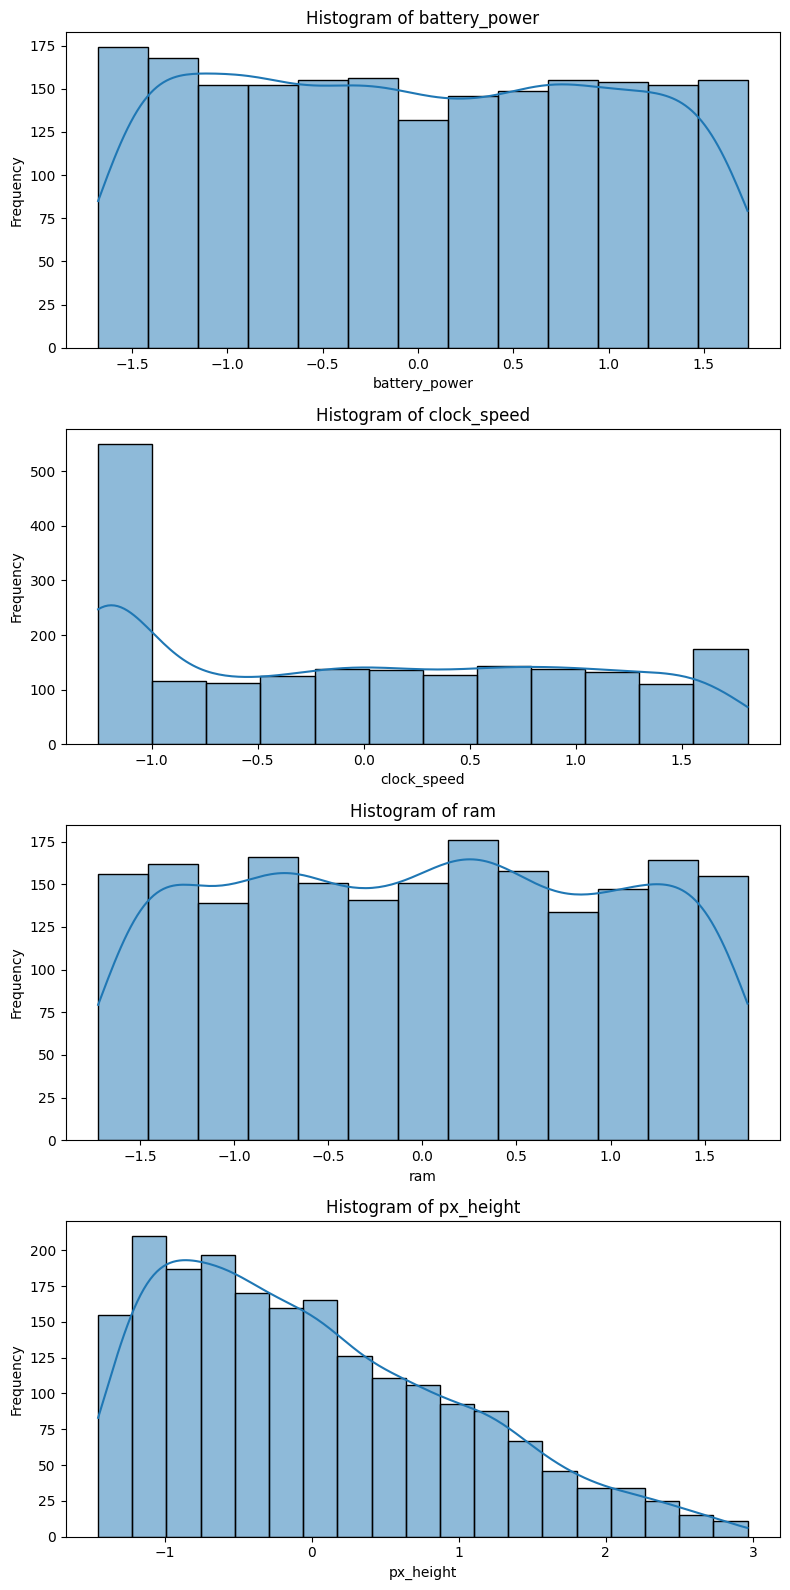

In [65]:
# Select a few continuous features for visualization
features_to_visualize = ['battery_power', 'clock_speed', 'ram', 'px_height']

# Set up the figure for the histograms
fig, axes = plt.subplots(len(features_to_visualize), 1, figsize=(8, 4 * len(features_to_visualize)))
axes_iter = axes.flat

# Loop through the features and create histograms
for feature, ax in zip(features_to_visualize, axes_iter):
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Analyze Correlation of Features**

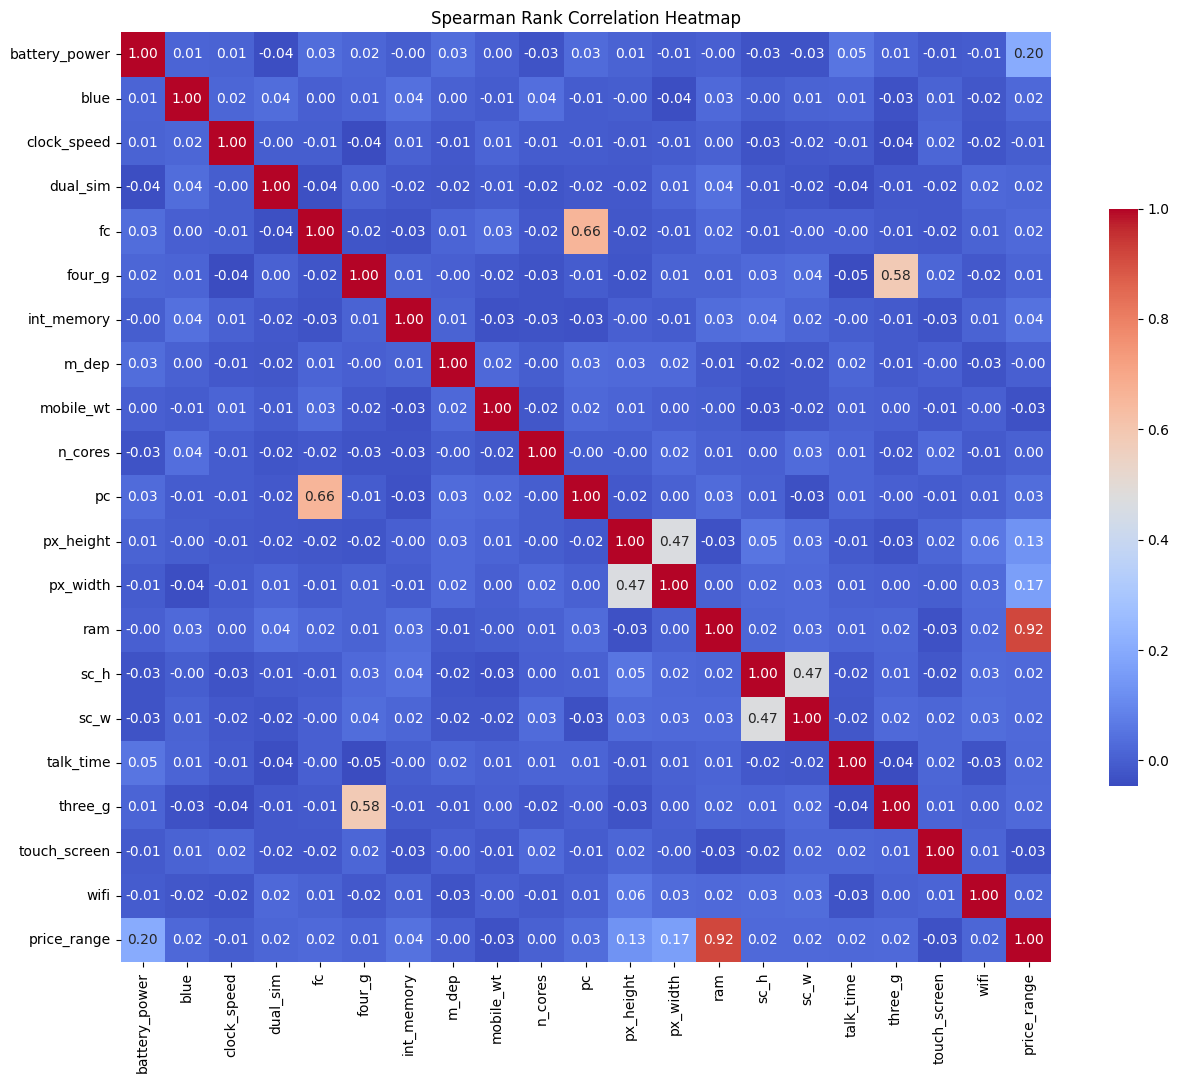

In [8]:
# Calculate the Spearman's rank correlation matrix
corr_matrix = data.corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

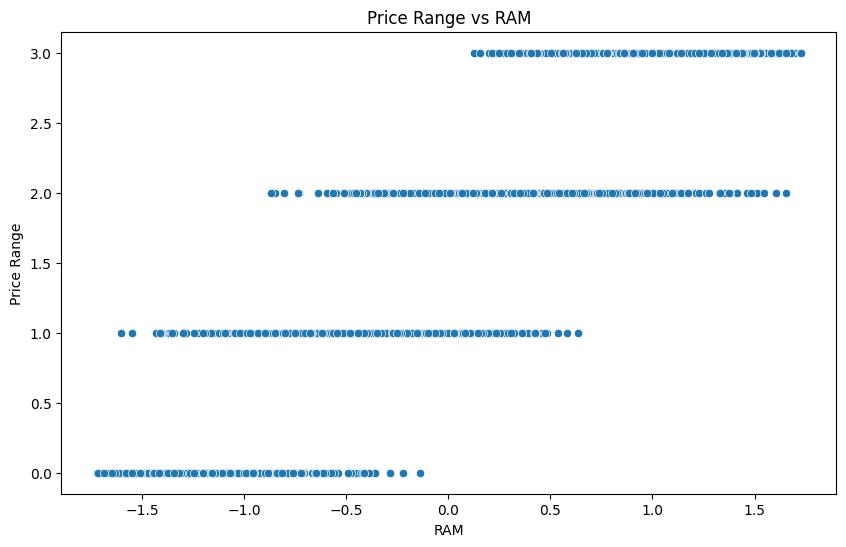

In [17]:
# Plot price_range vs RAM to visualize their relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram', y='price_range', data=data)
plt.title('Price Range vs RAM')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

**Split and Train KNN Model** - All Features

In [66]:
# Define the range of n_neighbors and random states
n_neighbors_range = range(1, 16)
random_states = range(1, 21)

# Initialize a dictionary to store the accuracy scores
scores = {
    'random_state': [],
    'n_neighbors': [],
    'training_accuracy': [],
    'test_accuracy': []
}

# Train and evaluate the model for each combination of n_neighbors and random_state
for random_state in random_states:
    for n_neighbors in n_neighbors_range:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

        # Initialize and train the KNN model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)

        # Make predictions and calculate accuracy for training and test sets
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)
        training_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store the scores
        scores['random_state'].append(random_state)
        scores['n_neighbors'].append(n_neighbors)
        scores['training_accuracy'].append(training_accuracy)
        scores['test_accuracy'].append(test_accuracy)

# Convert the scores dictionary to a DataFrame for better visualization
scores_all_features_df = pd.DataFrame(scores)
scores_all_features_df.head()

,random_state,n_neighbors,training_accuracy,test_accuracy
0,1,1,1.000000,0.5125
1,1,2,0.758125,0.5150
2,1,3,0.761250,0.5350
3,1,4,0.761250,0.5575
4,1,5,0.752500,0.5625


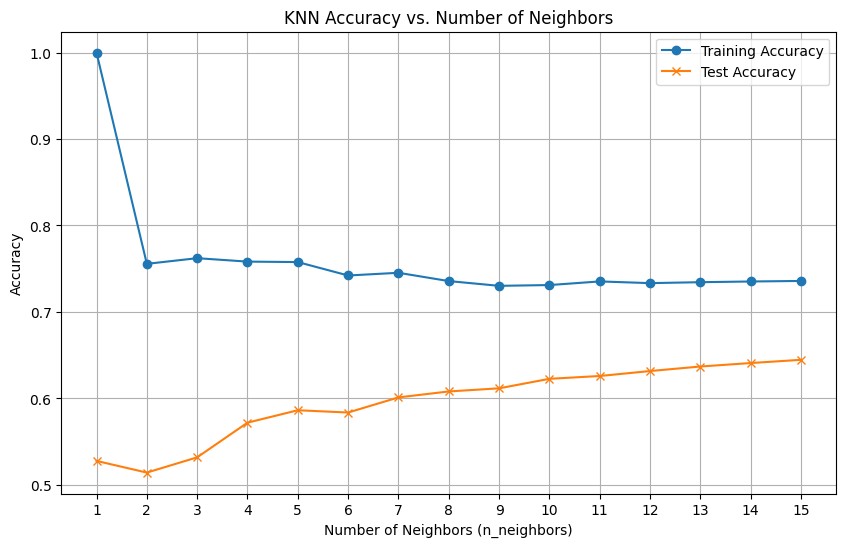

In [67]:
# Group by 'n_neighbors' and calculate mean for training and test accuracies
mean_scores = scores_all_features_df.groupby('n_neighbors').agg({'training_accuracy': 'mean', 'test_accuracy': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(mean_scores['n_neighbors'], mean_scores['training_accuracy'], label='Training Accuracy', marker='o')
plt.plot(mean_scores['n_neighbors'], mean_scores['test_accuracy'], label='Test Accuracy', marker='x')

plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 16))  # Assuming n_neighbors_range is from 1 to 15
plt.grid(True)
plt.legend()

plt.show()

**Split and Train KNN Model** - Correlated Features

In [78]:
# Re-initialize the scores dictionary
scores = {
    'random_state': [],
    'n_neighbors': [],
    'training_accuracy': [],
    'test_accuracy': []
}

# Train and evaluate the model for each combination of n_neighbors and random_state
for random_state in random_states:
    for n_neighbors in n_neighbors_range:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X[['ram', 'battery_power', 'px_height', 'px_width']],
                                                            y, test_size=0.2, random_state=random_state)

        # Initialize and train the KNN model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train, y_train)

        # Make predictions and calculate accuracy for training and test sets
        y_train_pred = knn.predict(X_train)
        y_test_pred = knn.predict(X_test)
        training_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store the scores
        scores['random_state'].append(random_state)
        scores['n_neighbors'].append(n_neighbors)
        scores['training_accuracy'].append(training_accuracy)
        scores['test_accuracy'].append(test_accuracy)

# Convert the scores dictionary to a DataFrame for better visualization
scores_df = pd.DataFrame(scores)

In [79]:
scores_df.head(30)

,random_state,n_neighbors,training_accuracy,test_accuracy
0,1,1,1.000000,0.8525
1,1,2,0.933750,0.8275
2,1,3,0.954375,0.8775
3,1,4,0.925625,0.8600
4,1,5,0.939375,0.8825
5,1,6,0.912500,0.8700
6,1,7,0.926250,0.8825
7,1,8,0.921250,0.8625
8,1,9,0.931875,0.8775
9,1,10,0.923750,0.8775


In [80]:
# Filter the scores
# Get training accuracy > 90% and test accuracy > 80%
filtered_df = scores_df[(scores_df['training_accuracy'] >= 0.90) & (scores_df['test_accuracy'] >= 0.80)]

# Calculate the difference between training and test accuracy
filtered_df['accuracy_difference'] = abs(filtered_df['training_accuracy'] - filtered_df['test_accuracy'])

# Sort the filtered DataFrame based on the difference in accuracies, in ascending order
sorted_df = filtered_df.sort_values(by='accuracy_difference', ascending=True)

# Display only the top 20 entries
top_20_scores = sorted_df.head(20)
top_20_scores

,random_state,n_neighbors,training_accuracy,test_accuracy,accuracy_difference
223,15,14,0.920000,0.9200,0.000000
41,3,12,0.918750,0.9175,0.001250
86,6,12,0.923125,0.9250,0.001875
206,14,12,0.914375,0.9125,0.001875
88,6,14,0.922500,0.9250,0.002500
207,14,13,0.920625,0.9175,0.003125
40,3,11,0.923750,0.9275,0.003750
44,3,15,0.918125,0.9225,0.004375
163,11,14,0.914375,0.9100,0.004375
160,11,11,0.922500,0.9175,0.005000


**Plot Average Accuracies for All Random States and n=[1-15]**

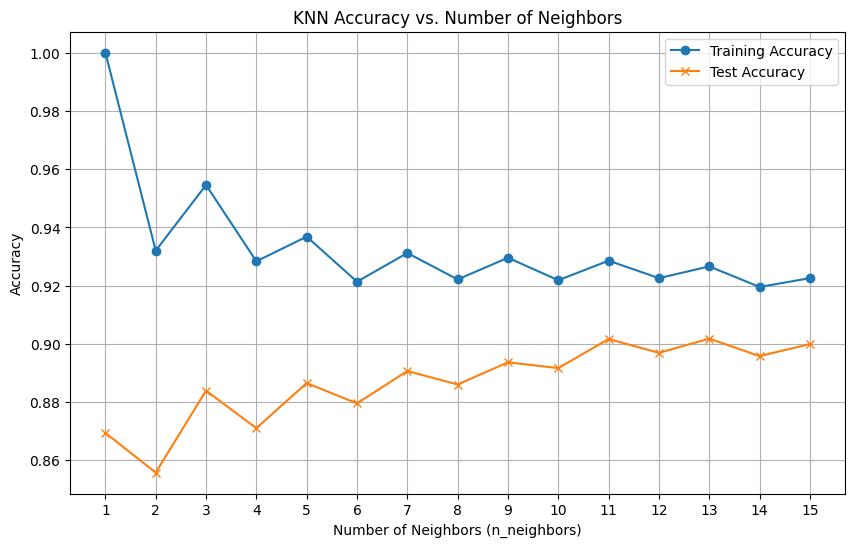

In [29]:
# Group by 'n_neighbors' and calculate mean for training and test accuracies
mean_scores = scores_df.groupby('n_neighbors').agg({'training_accuracy': 'mean', 'test_accuracy': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(mean_scores['n_neighbors'], mean_scores['training_accuracy'], label='Training Accuracy', marker='o')
plt.plot(mean_scores['n_neighbors'], mean_scores['test_accuracy'], label='Test Accuracy', marker='x')

plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 16))  # Assuming n_neighbors_range is from 1 to 15
plt.grid(True)
plt.legend()

plt.show()

**INSIGHTS**

The analysis of the mobile phone dataset has provided significant insights into the factors that influence a phone's price range and has demonstrated the importance of meticulous data analysis, feature scaling, and feature selection in building a predictive model. Here are some key takeaways and the importance of each step in the process:

    Importance of Data Analysis:
        The initial data exploration, including visualization of the distribution of features and correlation analysis, is crucial.
        It helps in understanding the underlying structure of the data and in identifying which features have the most influence
        on the target variable, in this case, the price_range.
        
        Spearman's rank correlation was particularly useful in this context due to the mixed data types and the non-linear
         relationships present in the dataset.

    Feature Scaling:
        Feature scaling, through methods such as standardization, was critical in normalizing the ranges of the continuous features.
        This is especially important for distance-based algorithms like KNN, as it ensures that each feature contributes equally
        to the distance calculations, preventing features with larger ranges from dominating the model.

    Feature Selection:
        Selecting features that have a significant correlation with the target variable can greatly improve model performance.
        The analysis showed a notable difference in accuracies when using all features versus using only the selected
        significant features. This underscores the importance of feature selection in building efficient and effective
        predictive models.
        
        By focusing on the most relevant features, the model not only becomes simpler and faster but also
        avoids the risk of overfitting, which can occur when too many irrelevant or less important features are used.

    Training and Testing Across Multiple States and n Values:
        Conducting the training and testing of the model across multiple random states and varying the number of neighbors (n) in KNN
        ensures that the model's performance is robust and generalizable across different subsets of the data.

        This approach helps in identifying a good hyperparameter (n) for the model, as it accounts for variability in the data
        splits and reduces the risk of overfitting to a particular sample of the data.

    Identifying the Best n Values:
        The analysis indicated that the best values for n, based on the plotted mean scores, range from 11 to 15.
        
        This suggests that considering a larger number of neighbors helps in making more stable and reliable predictions,
        as it reduces the noise in the classification process.

    Additional Insights:
        It's also important to consider the balance between model complexity and performance. While a more complex model
         (with a lower n) might provide higher accuracy on the training set, it might not generalize well to unseen data.
         
         The chosen range of 11 to 15 for n strikes a good balance, providing high accuracy while preventing the model
         from becoming too sensitive to the training data.


**CONCLUSION**

This analysis underscores the importance of a comprehensive approach to building predictive models, involving careful data preprocessing, feature selection, and rigorous validation methods. By carefully tuning and validating the model across multiple parameters and ensuring it focuses on the most relevant features, we can build a model that not only performs well on the given dataset but is also robust and generalizable to new, unseen data.
